# Problem Statement 1

In [1]:

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install sklearn
!pip install tensorflow
!pip install scikit-learn


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
sns.set()  

In [3]:
# Creating a separate dataframe  with only numerical features

Country = pd.read_csv('Assignment 5 Datasets/Country-data.csv')
Country.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
Country_num = Country.drop(['country'], axis=1)

Country_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Scale the data using the Standard Scaler to create a scaled DataFrame

standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(Country_num)

scaled_df = pd.DataFrame(scaled, columns=Country_num.columns)

scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


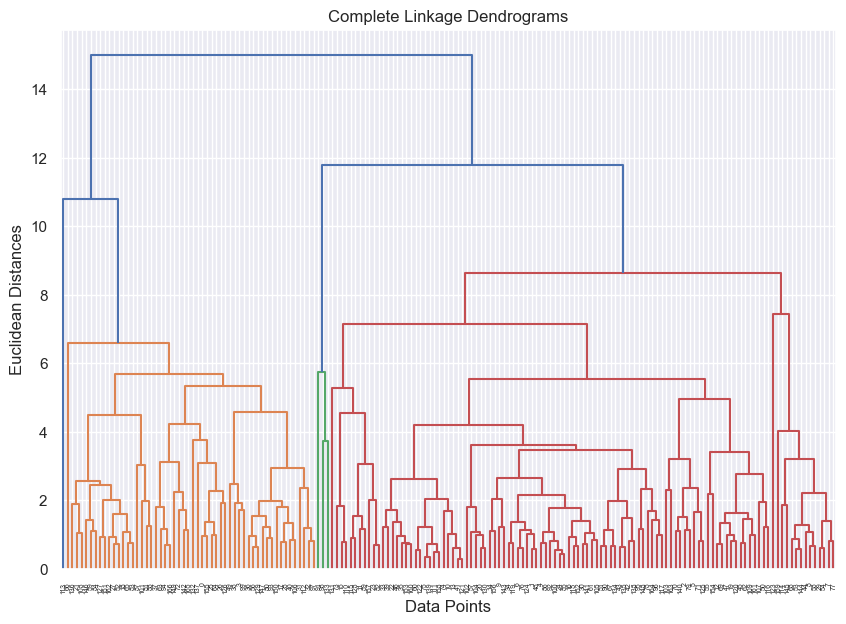

In [6]:

# Plotting dendograms with the complete linkage method

# Compute the linkage
Z = linkage(scaled_df, method='complete')  # use 'complete' linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Complete Linkage Dendrograms")
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [7]:
# Creating cluster labels using cut tree

labels = cut_tree(Z, n_clusters=3)

scaled_df_1 =scaled_df.copy()

# Creating a new dataframe to store the cluster labels

scaled_df_1['Hierarchical_cluster_labels'] = labels

scaled_df_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


In [8]:
# Performing the 4 compenents PCA on the dataframe

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_df)

# Convert the principal components into a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

principalDf ['Hierarchical_cluster_labels'] = labels

principalDf

,PC1,PC2,PC3,PC4,Hierarchical_cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,1
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,0
163,-0.551036,-1.233886,3.101350,-0.115311,1
164,0.498524,1.390744,-0.238526,-1.074098,1
165,-1.887451,-0.109453,1.109752,0.056257,0


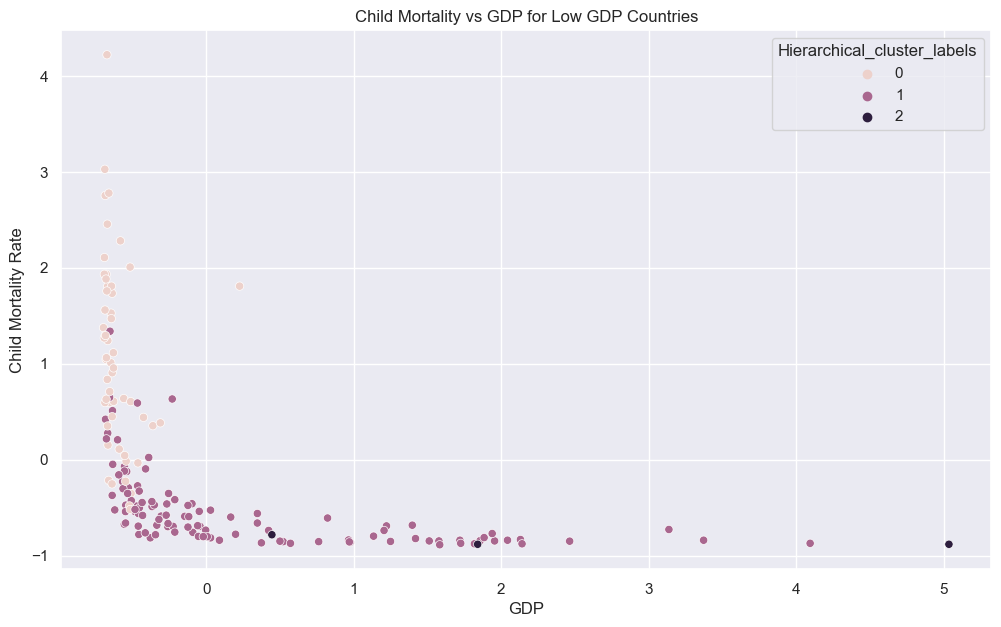

In [9]:
# . Now, from final the DataFrame, analyze how low GDP rate corresponds to the chil mortality rate around the world

# 3. Visual Analysis
plt.figure(figsize=(12, 7))
sns.scatterplot(data = scaled_df_1, x = 'gdpp', y ='child_mort', hue='Hierarchical_cluster_labels')
plt.title("Child Mortality vs GDP for Low GDP Countries")
plt.xlabel("GDP")
plt.ylabel("Child Mortality Rate")
plt.grid(True)
plt.show()



# Problem 2

In [10]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree


#  Load the Given CSV file into a DataFrame

Credit= pd.read_csv('Assignment 5 Datasets/Credit Card Customer Data.csv')
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
# 2. Finding missing values and drop unnecessary columns
#Credit.isnull().sum()

Credit = Credit.drop(columns=['Sl_No', 'Customer Key'], axis=1)

In [12]:
Credit.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
Credit.dropna()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


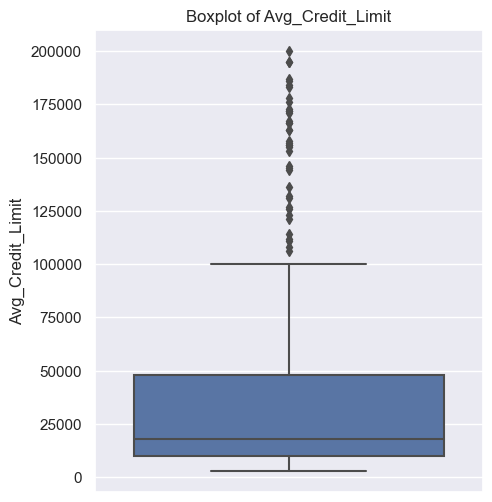

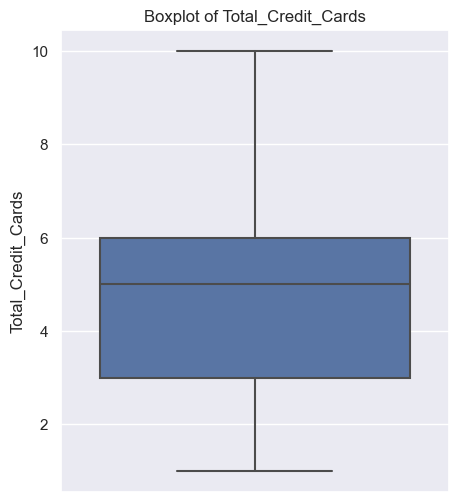

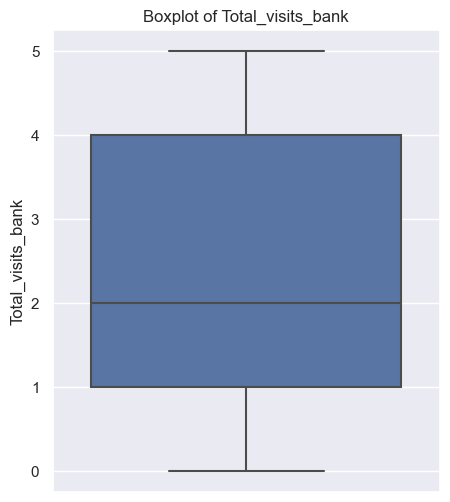

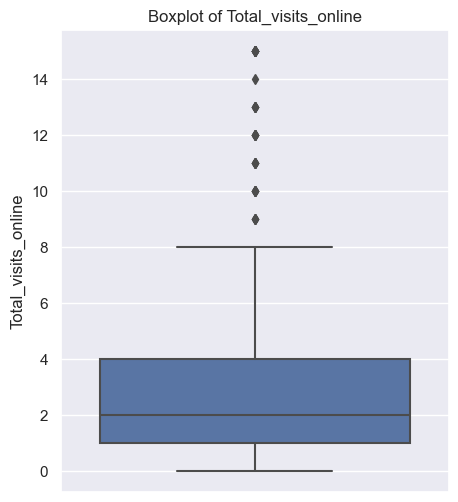

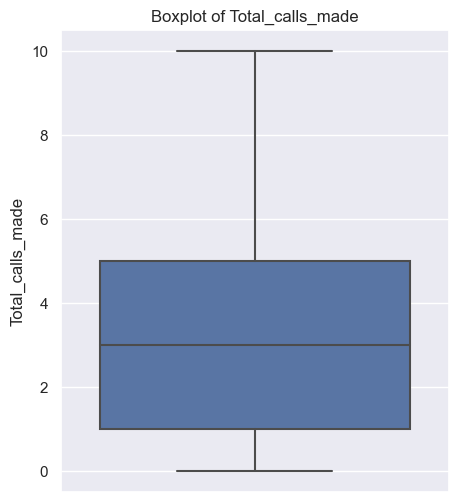

In [14]:
# 3. Univariate and bivariate analysis

for column in Credit.columns:
    plt.figure(figsize=(5,6))
    sns.boxplot(y=Credit[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

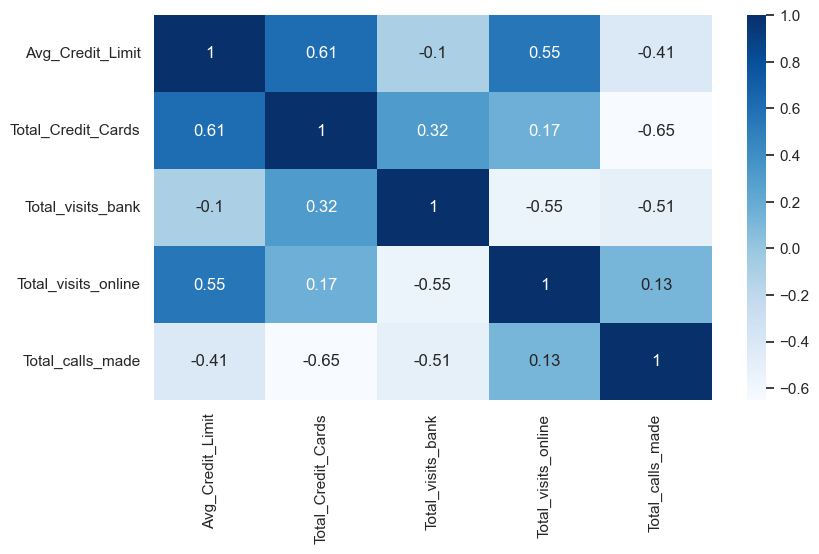

In [15]:
plt.figure(figsize=(9,5))
sns.heatmap(Credit.corr(), cmap='Blues',annot=True)
plt.show()

In [16]:
# 4. Standardize the whole dataset
scaler_1 = StandardScaler()

scaled_df_2 = pd.DataFrame(scaler_1.fit_transform(Credit), columns= Credit.columns)

scaled_df_2 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [17]:
scaled_df_2.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [18]:
# 5. Find the within-cluster sum of square
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(scaled_df_2)
    wcss.append(kmeans.inertia_)

wcss




[2040.989816478495,
 933.0437490000535,
 780.7736895551768,
 704.4759188657505,
 642.2737121575753,
 599.9253971004575,
 567.3277733596053,
 542.2532470747237,
 516.2420460527363,
 484.31791977135197,
 467.1541962901274,
 443.24238174357345,
 424.190022231306]

In [19]:
# 6. Find silhouette score

from sklearn.metrics import silhouette_score
sil_scores = []
for i in range(2, 15):  # Silhouette score is valid for n_clusters > 1
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(scaled_df_2)
    scores = silhouette_score(scaled_df_2, kmeans.labels_)
    sil_scores.append(scores)

sil_scores

[0.41842496663215445,
 0.5157182558881063,
 0.3556670619372605,
 0.2717470361089752,
 0.25545029453623114,
 0.2479121683423175,
 0.24070401071920466,
 0.20866295070582577,
 0.21146095650447713,
 0.2056195464865593,
 0.21363187229839944,
 0.2062358983669577,
 0.20898492922014678]

In [20]:
optimal_k = pd.DataFrame({'K':range(2,15), 'WCSS':wcss, 'silhouette_score':sil_scores})
optimal_k

,K,WCSS,silhouette_score
0,2,2040.989816,0.418425
1,3,933.043749,0.515718
2,4,780.773690,0.355667
3,5,704.475919,0.271747
4,6,642.273712,0.255450
5,7,599.925397,0.247912
6,8,567.327773,0.240704
7,9,542.253247,0.208663
8,10,516.242046,0.211461
9,11,484.317920,0.205620


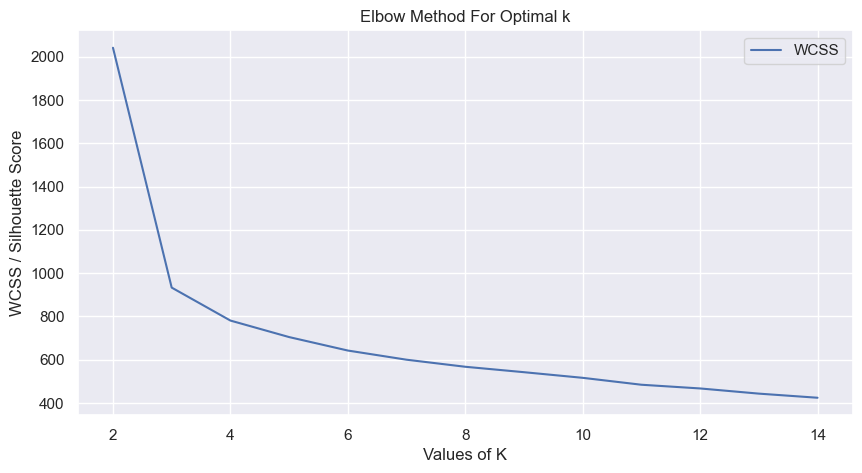

In [22]:
# 7. Line plot for different sizes of K
plt.figure(figsize=(10, 5))
plt.plot(range(2,15), wcss,label='WCSS')
# plt.plot(range(2, 15), sil_scores, marker='x', label='Silhouette Score')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Values of K')
plt.ylabel('WCSS / Silhouette Score')
plt.legend()
plt.show()

In [23]:
# From the plot, decide the optimal number of clusters 'k'
optimal_k = 3  # Replace with the observed optimal value

# 8. Build the final model
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(scaled_df_2)


KMeans(n_clusters=3)

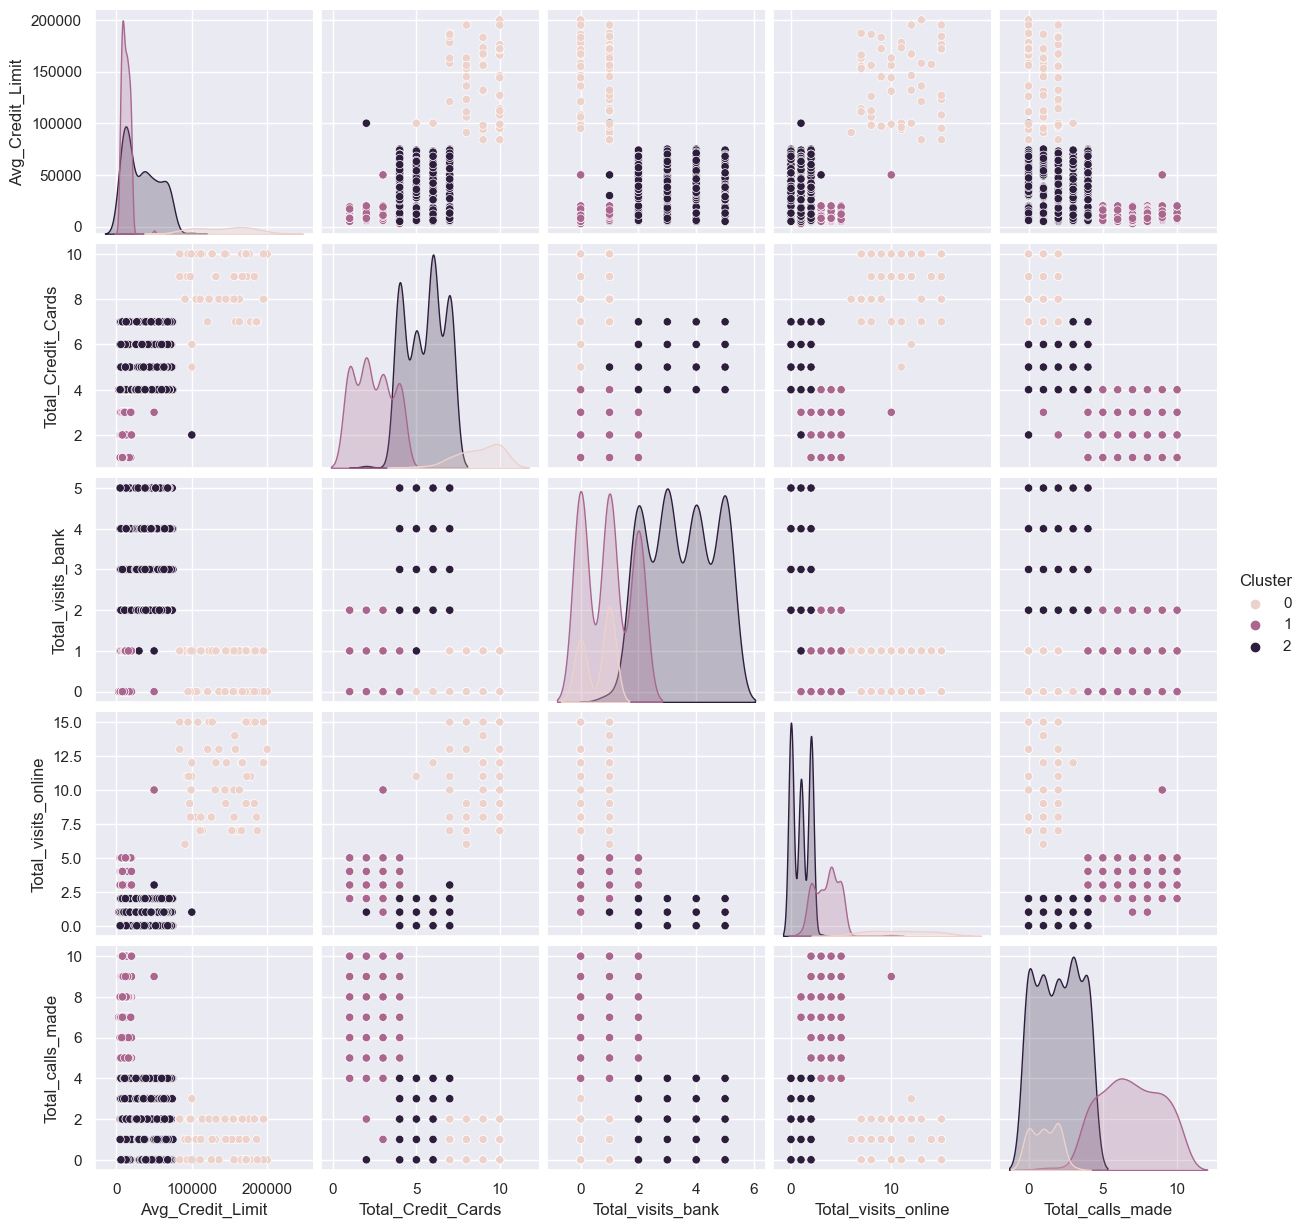

In [24]:
# 9. Observe Cluster behavior with different columns
Credit['Cluster'] = kmeans.labels_
sns.pairplot(Credit, hue='Cluster')
plt.show()


In [25]:

# Print Co-ordinates of all centroids and silhouette scores for the final model
print("Centroids:", kmeans.cluster_centers_)
print("Silhouette Score for the final model:", silhouette_score(scaled_df_2, kmeans.labels_))

Centroids: [[ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]]
Silhouette Score for the final model: 0.5157182558881063


# Problem 3



In [26]:
M_data = pd.read_csv('Assignment 5 Datasets/Mall_Customers.csv')
M_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
correlation = M_data.corr()
#M.drop(correlation.idxmin(), axis=1, inplace=True)
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [28]:
M_data =M_data.drop('CustomerID', axis=1)

M_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [29]:
df = pd.concat([M_data, pd.get_dummies(M_data['Gender'], prefix='Gender')], axis=1)
df.drop('Gender', axis=1, inplace=True)


In [30]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [31]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=12.5, min_samples=4)
clusters = dbscan.fit_predict(df)

df['cluster'] = clusters

# Print the size of each cluster and the size of the outliers' cluster
print(df['cluster'].value_counts())
print('Outliers:', sum(clusters == -1))

 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: cluster, dtype: int64
Outliers: 18


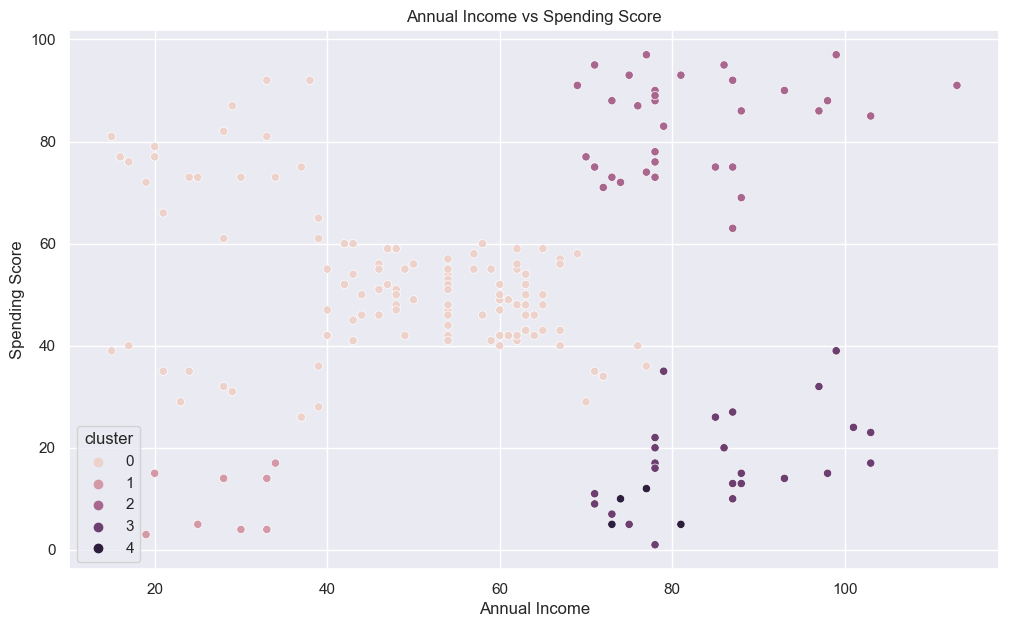

In [32]:
# 5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

# drop the outliers' cluster
df = df[df['cluster'] != -1]

plt.figure(figsize=(12, 7))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y ='Spending Score (1-100)', hue='cluster')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


# Problem Statement 4

In [33]:
# loading the grocery dataset

Grocery = pd.read_csv('Assignment 5 Datasets/Groceries Data.csv')

Grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [34]:
Grocery.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [35]:
# Installing mlxtend package

!pip install mlxtend

In [36]:
# printing the customer data where the member number is 1001

Grocery.loc[Grocery['Member_number'] == 1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [37]:
# Creating a new column as item count and assigning the value as 1

Grocery['item_count'] = 1


In [ ]:
Grocery.drop(['month', 'day', 'year', 'day_of_week'], axis=1, inplace=True)

In [38]:
Grocery.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,item_count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1


In [47]:
# # Creating a new data frame where all data is grouped by member id and items they bought and setting their value as item count.

Grocery_pivot = Grocery_new.pivot(index='Member_number', columns='itemDescription', values='item_count').fillna(0)

Grocery_pivot.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [50]:
# Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

from mlxtend.frequent_patterns import apriori, association_rules

Grocery_pivot = Grocery_pivot.applymap(lambda x: 1 if x >= 1 else 0)

frequent_itemsets = apriori(Grocery_pivot, min_support=0.07, use_colnames=True)
print(frequent_itemsets)


     support                                    itemsets
0   0.078502                                  (UHT-milk)
1   0.119548                                      (beef)
2   0.079785                                   (berries)
3   0.158799                              (bottled beer)
4   0.213699                             (bottled water)
..       ...                                         ...
78  0.075680                    (tropical fruit, yogurt)
79  0.079785            (whipped/sour cream, whole milk)
80  0.150590                        (yogurt, whole milk)
81  0.082093  (whole milk, other vegetables, rolls/buns)
82  0.071832      (other vegetables, yogurt, whole milk)

[83 rows x 2 columns]


c:\Users\mase-\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
# Generating the rules with their corresponding support, confidence, and lift

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
1,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988,0.273711
2,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450,0.229175
3,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832,0.072964
...,...,...,...,...,...,...,...,...,...,...
93,"(other vegetables, whole milk)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870,0.304344
94,"(yogurt, whole milk)",(other vegetables),0.150590,0.376603,0.071832,0.477002,1.266589,0.015119,1.191967,0.247793
95,(other vegetables),"(yogurt, whole milk)",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608,0.337631
96,(yogurt),"(other vegetables, whole milk)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727,0.343217


In [52]:
# Filtering out the values with lift > = 1 and confidence > = 0.5

rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
18,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
20,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775,0.133115
38,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
42,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572,0.129931
44,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239,0.122020
55,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
66,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
